In [22]:
# All tickets in the roadmap for Q1 2020 for the network team
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=closed&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&keywords=~network-team-roadmap-2020Q1&col=id&col=summary&col=status&col=owner&col=type&col=priority&col=milestone&col=component&col=actualpoints&col=parent&col=points&col=sponsor&order=priority
csv_path='/Users/gaba/Code/torproject/trac/datasets/NetworkTeam-Roadmap-Q1-2020.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)
open_tickets = csv_file.query('Status!="closed"')


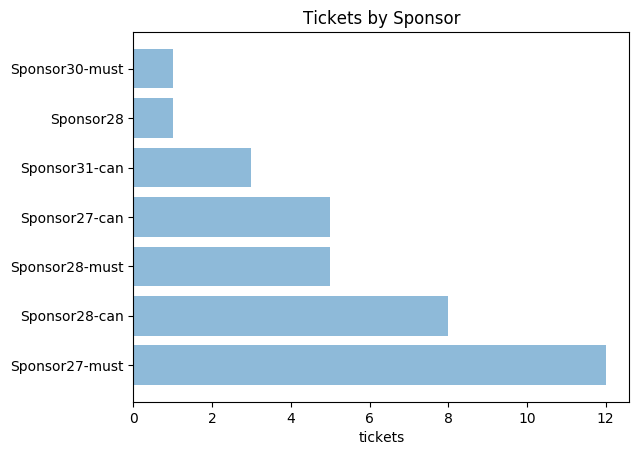

In [13]:
# which sponsors we are covering
tickets_by_sponsor = csv_file['Sponsor'].value_counts()

objects = tuple(tickets_by_sponsor.keys())
y_pos = np.arange(len(objects))
performance = list(tickets_by_sponsor)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets')
plt.title('Tickets by Sponsor')

plt.show()

In [14]:
# priorities for open tickets
open_tickets['Priority'].value_counts()

Medium       49
High          4
Very High     1
Low           1
Name: Priority, dtype: int64

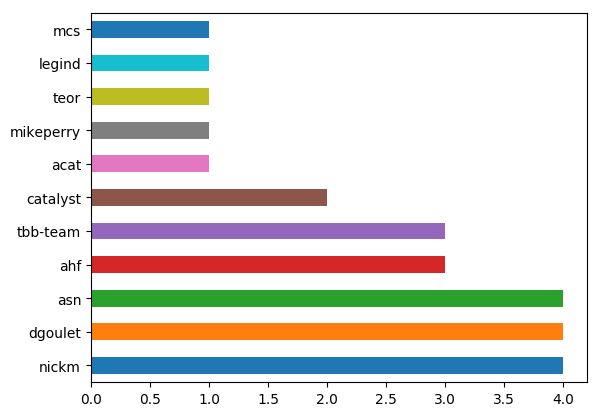

In [15]:
# who is owning the tickets
open_tickets['Owner'].value_counts().plot.barh()

In [16]:
# how many big tickets
open_tickets['Points'].value_counts()

1.0     11
5.0      5
0.1      3
3.0      3
0.5      3
0.2      2
6.0      2
8.0      2
23.0     2
4.0      2
72.0     1
13.0     1
50.0     1
20.0     1
12.0     1
7.0      1
16.0     1
17.0     1
24.0     1
15.0     1
2.0      1
10.0     1
Name: Points, dtype: int64

In [48]:
# how many points in total
open_tickets.filter(items=['Points']).sum()

Points    387.2
dtype: float64

In [24]:
# how many points per person
open_tickets.filter(items=['Owner', 'Points']).groupby('Owner').sum()



,Points
Owner,
acat,6.0
ahf,12.0
asn,20.2
catalyst,5.0
dgoulet,13.3
legind,20.0
mcs,17.0
mikeperry,5.0
nickm,29.0


In [35]:
# how many points still have no owner
bool_series = pd.isnull(open_tickets["Owner"])
no_owner=open_tickets[bool_series] 

no_owner.filter(items=['Points']).sum()

Points    178.7
dtype: float64

In [47]:
# what are the tickets with no estimation
bool_series = pd.isnull(open_tickets["Points"])
open_tickets[bool_series]

,id,Summary,Status,Owner,Type,Priority,Milestone,Component,Actual Points,Parent ID,Points,Sponsor
0,24554,sched: Have per-scheduler type data in a chann...,assigned,NaN,enhancement,Very High,Tor: unspecified,Core Tor/Tor,NaN,#23993,NaN,NaN
1,23744,sched: Notification events have different mean...,assigned,NaN,defect,High,Tor: unspecified,Core Tor/Tor,NaN,#23993,NaN,NaN
16,29128,Place complete obfs4 bridge line in accessible...,new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,#30471,NaN,Sponsor28-must
20,29245,"Tor 0.4 eventually hits ""Delaying directory fe...",new,NaN,defect,Medium,Tor: unspecified,Core Tor/Tor,NaN,NaN,NaN,Sponsor28-must
30,30477,Tor should self-test reachability of TCP liste...,new,NaN,task,Medium,Tor: unspecified,Core Tor/Tor,NaN,#31280,NaN,Sponsor30-must
40,32208,write description of control subsystem archite...,accepted,catalyst,task,Medium,Tor: 0.4.3.x-final,Core Tor/Tor,NaN,#29215,NaN,NaN
52,32784,Find and remove upward dependencies in our cod...,new,NaN,defect,Medium,Tor: 0.4.3.x-final,Core Tor/Tor,NaN,NaN,NaN,NaN
58,29111,Optional heartbeat message from PT's,new,NaN,enhancement,Low,Tor: unspecified,Circumvention/Pluggable transport,NaN,NaN,NaN,Sponsor28-must


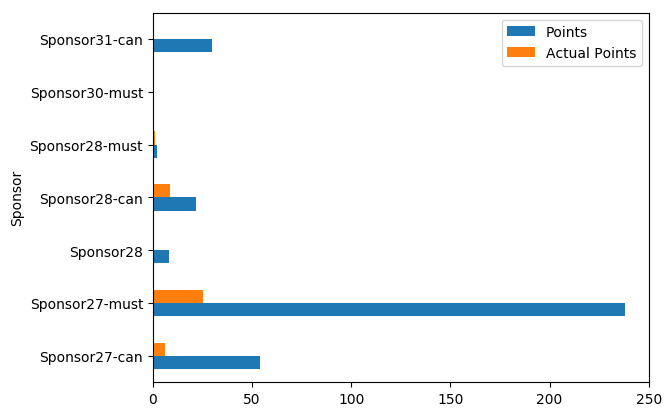

In [19]:
# How many days is still remaining, actual points versus estimation
open_tickets.filter(items=['Sponsor', 'Points', 'Actual Points']).groupby('Sponsor').sum().plot.barh()


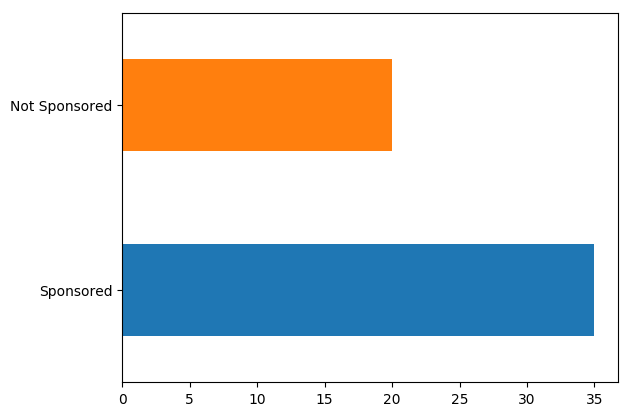

In [20]:
# How much work is not sponsored

sponsor_and_not = open_tickets['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_and_not.plot.barh()


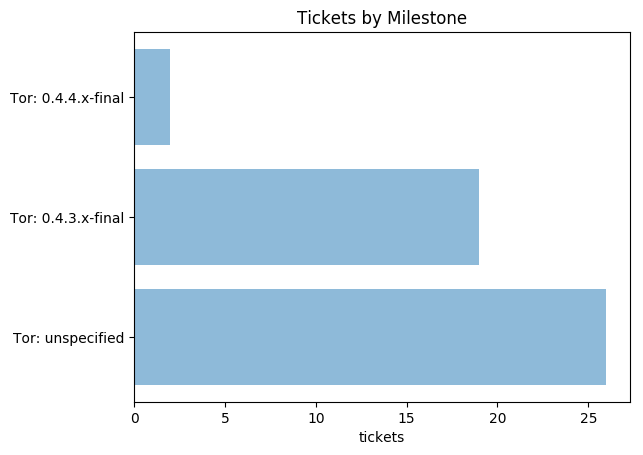

In [50]:
# tickets per milestone
tickets_by_milestone = open_tickets['Milestone'].value_counts()

objects = tuple(tickets_by_milestone.keys())
y_pos = np.arange(len(objects))
performance = list(tickets_by_milestone)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets')
plt.title('Tickets by Milestone')

plt.show()

